In [9]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    # We need to mask the negative differences
    # since we are looking for values above
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c # returns min index of the nearest if target is greater than any value
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [10]:
def hist_match(original, specified):

    oldshape = original.shape
    original = original.ravel()
    specified = specified.ravel()

    # get the set of unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique(original, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(specified, return_counts=True)

    # Calculate s_k for original image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    # Calculate s_k for specified image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # Round the values
    sour = np.around(s_quantiles*255)
    temp = np.around(t_quantiles*255)
    
    # Map the rounded values
    b=[]
    for data in sour[:]:
        b.append(find_nearest_above(temp,data))
    b= np.array(b,dtype='uint8')

    return b[bin_idx].reshape(oldshape)

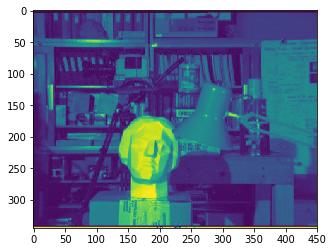

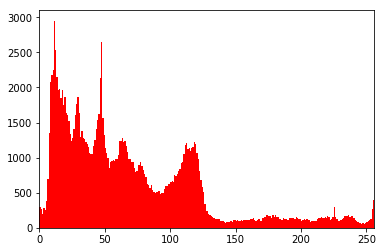

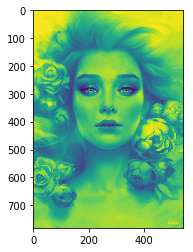

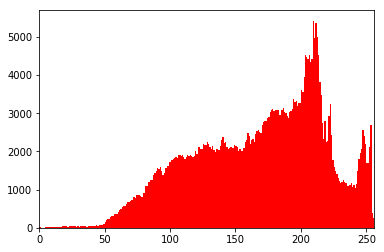

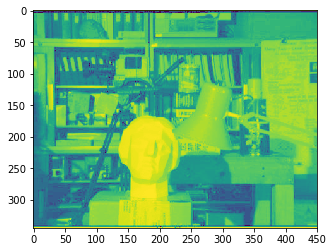

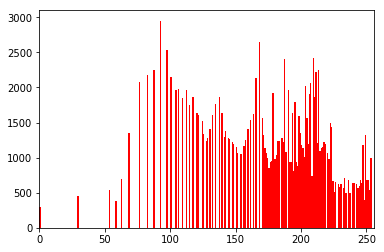

In [11]:
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

# Load the images in greyscale
original = cv2.imread('images/head.jpg',0)
specified = cv2.imread('images/lady.jpg',0)

# perform Histogram Matching
a = hist_match(original, specified)


# Display the images
plt.imshow(original) 
plt.show()
#display the histogram
hist,bins = np.histogram(original.flatten(),256,[0,256])
plt.hist(original.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

plt.imshow(specified) 
plt.show()
#display the histogram
hist,bins = np.histogram(specified.flatten(),256,[0,256])
plt.hist(specified.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

plt.imshow(a) 
plt.show()
#display the histogram
hist,bins = np.histogram(a.flatten(),256,[0,256])
plt.hist(a.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()


In [12]:
#copywrite https://theailearner.com/2019/04/10/histogram-matching-specification/